In [15]:
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

In [16]:
# Precision of fortran tag
int_precision = 'int32'
# Precision of data in input file
float_precision = 'float32'
# Precision of data in input file
logical_precision = 'int32'

In [17]:
# Initialize outputs in case file does not exist or is empty
nodata = -9999
date_time = {
    'year': nodata,
    'month': nodata,
    'day': nodata,
    'hour': nodata,
    'min': nodata,
    'sec': nodata,
    'dofyr': nodata,
    'pentad': nodata
}

obs_assim = []
obs_species = []
obs_tilenum = []
obs_lon = []
obs_lat = []
obs_obs = []
obs_obsvar = []
obs_fcst = []
obs_fcstvar = []
obs_ana = []
obs_anavar = []

In [18]:
# Determine machine format
machfmt = 'b'

In [19]:
# Determine filename
#fname = '/discover/nobackup/amfox/Experiments/ASCAT_test/ASCAT_M36/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2019/M07/ASCAT_M36.ens_avg.ldas_ObsFcstAna.20190701_0600z.bin'
#tmpname = fname.split('/')
#pname = tmpname[len(tmpname)-1]

# Get a list of files with a similar name in a directory
# path = '/discover/nobackup/amfox/Experiments/ASCAT_test/ASCAT_M36/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2019/M07'
test_data = '/Users/amfox/Desktop/GEOSldas_diagnostics/test_data'
path = test_data
file_name = 'OLv7_M36.ens_avg'
file_ext = '.bin'
files = [file for file in os.listdir(path) if file.startswith(file_name) and file.endswith(file_ext)]


print(files)

['OLv7_M36.ens_avg.ldas_ObsFcstAna.20190701_0600z.bin', 'OLv7_M36.ens_avg.ldas_ObsFcstAna.20190701_1800z.bin', 'OLv7_M36.ens_avg.ldas_ObsFcstAna.20190705_2100z.bin', 'OLv7_M36.ens_avg.ldas_ObsFcstAna.20190705_0900z.bin', 'OLv7_M36.ens_avg.ldas_ObsFcstAna.20190704_0300z.bin', 'OLv7_M36.ens_avg.ldas_ObsFcstAna.20190703_1500z.bin', 'OLv7_M36.ens_avg.ldas_ObsFcstAna.20190703_0900z.bin', 'OLv7_M36.ens_avg.ldas_ObsFcstAna.20190703_2100z.bin', 'OLv7_M36.ens_avg.ldas_ObsFcstAna.20190702_0300z.bin', 'OLv7_M36.ens_avg.ldas_ObsFcstAna.20190705_1500z.bin', 'OLv7_M36.ens_avg.ldas_ObsFcstAna.20190704_2100z.bin', 'OLv7_M36.ens_avg.ldas_ObsFcstAna.20190704_0900z.bin', 'OLv7_M36.ens_avg.ldas_ObsFcstAna.20190702_1500z.bin', 'OLv7_M36.ens_avg.ldas_ObsFcstAna.20190705_0300z.bin', 'OLv7_M36.ens_avg.ldas_ObsFcstAna.20190701_1200z.bin', 'OLv7_M36.ens_avg.ldas_ObsFcstAna.20190702_0900z.bin', 'OLv7_M36.ens_avg.ldas_ObsFcstAna.20190702_2100z.bin', 'OLv7_M36.ens_avg.ldas_ObsFcstAna.20190704_1500z.bin', 'OLv7_M36

In [20]:
# Open each file in turn
mode = 'rb' if machfmt == 'b' else 'rl'

for file in files:
    with open(os.path.join(path, file), mode) as ifp:
        print ('Reading file ', file, '...')
        
        # Read N_obs and time stamp entry
        fortran_tag = np.fromfile(ifp, int_precision, 1)
        N_obs = np.fromfile(ifp, int_precision, 1)
        N_obs = int(N_obs)
        year = np.fromfile(ifp, int_precision, 1)
        month = np.fromfile(ifp, int_precision, 1)
        day = np.fromfile(ifp, int_precision, 1)
        hour = np.fromfile(ifp, int_precision, 1)
        minute = np.fromfile(ifp, int_precision, 1)
        second = np.fromfile(ifp, int_precision, 1)
        dofyr = np.fromfile(ifp, int_precision, 1)
        pentad = np.fromfile(ifp, int_precision, 1)
        fortran_tag = np.fromfile(ifp, int_precision, 1)
        # Populate date_time structure
        date_time = {
            'year': year,
            'month': month,
            'day': day,
            'hour': hour,
            'min': minute,
            'sec': second,
            'dofyr': dofyr,
            'pentad': pentad
        }
        
        # Read observation assim flag
        fortran_tag = np.fromfile(ifp, int_precision, 1)
        tmp_data = np.fromfile(ifp, logical_precision, N_obs)
        fortran_tag = np.fromfile(ifp, int_precision, 1)
        tmp_data2 = np.zeros((N_obs, 1))
        indices = np.where(tmp_data != 0)[0]
        tmp_data2[indices] = 1
        obs_assim = np.append(obs_assim, tmp_data2)
        
        # Read species information
        fortran_tag = np.fromfile(ifp, int_precision, 1)
        obs_species = np.append(obs_species, np.fromfile(ifp, int_precision, N_obs))
        fortran_tag = np.fromfile(ifp, int_precision, 1)
        
        # Read tile number information
        fortran_tag = np.fromfile(ifp, int_precision, 1)
        obs_tilenum = np.append(obs_tilenum, np.fromfile(ifp, int_precision, N_obs))
        fortran_tag = np.fromfile(ifp, int_precision, 1)

        # Read longitude
        fortran_tag = np.fromfile(ifp, int_precision, 1)
        obs_lon = np.append(obs_lon, np.fromfile(ifp, float_precision, N_obs))
        fortran_tag = np.fromfile(ifp, int_precision, 1)

        # Read latitude
        fortran_tag = np.fromfile(ifp, int_precision, 1)
        obs_lat = np.append(obs_lat, np.fromfile(ifp, float_precision, N_obs))
        fortran_tag = np.fromfile(ifp, int_precision, 1)
        
        # Read observation value
        fortran_tag = np.fromfile(ifp, int_precision, 1)
        obs_obs = np.append(obs_obs, np.fromfile(ifp, float_precision, N_obs))
        fortran_tag = np.fromfile(ifp, int_precision, 1)

        # Read observation variance
        fortran_tag = np.fromfile(ifp, int_precision, 1)
        obs_obsvar = np.append(obs_obsvar, np.fromfile(ifp, float_precision, N_obs))
        fortran_tag = np.fromfile(ifp, int_precision, 1)

        # Read observation-space model forecast value
        fortran_tag = np.fromfile(ifp, int_precision, 1)
        obs_fcst = np.append(obs_fcst, np.fromfile(ifp, float_precision, N_obs))
        fortran_tag = np.fromfile(ifp, int_precision, 1)

        # Read observation-space model forecast variance
        fortran_tag = np.fromfile(ifp, int_precision, 1)
        obs_fcstvar = np.append(obs_fcstvar, np.fromfile(ifp, float_precision, N_obs))
        fortran_tag = np.fromfile(ifp, int_precision, 1)

        # Read observation-space analysis value
        fortran_tag = np.fromfile(ifp, int_precision, 1)
        obs_ana = np.append(obs_ana, np.fromfile(ifp, float_precision, N_obs))
        fortran_tag = np.fromfile(ifp, int_precision, 1)

        # Read observation-space analysis variance
        fortran_tag = np.fromfile(ifp, int_precision, 1)
        obs_anavar = np.append(obs_anavar, np.fromfile(ifp, float_precision, N_obs))
        fortran_tag = np.fromfile(ifp, int_precision, 1)
        
        
# Close file
    ifp.close()
    
print(len(obs_assim))
    
    

Reading file  OLv7_M36.ens_avg.ldas_ObsFcstAna.20190701_0600z.bin ...
Reading file  OLv7_M36.ens_avg.ldas_ObsFcstAna.20190701_1800z.bin ...
Reading file  OLv7_M36.ens_avg.ldas_ObsFcstAna.20190705_2100z.bin ...
Reading file  OLv7_M36.ens_avg.ldas_ObsFcstAna.20190705_0900z.bin ...
Reading file  OLv7_M36.ens_avg.ldas_ObsFcstAna.20190704_0300z.bin ...
Reading file  OLv7_M36.ens_avg.ldas_ObsFcstAna.20190703_1500z.bin ...
Reading file  OLv7_M36.ens_avg.ldas_ObsFcstAna.20190703_0900z.bin ...
Reading file  OLv7_M36.ens_avg.ldas_ObsFcstAna.20190703_2100z.bin ...
Reading file  OLv7_M36.ens_avg.ldas_ObsFcstAna.20190702_0300z.bin ...
Reading file  OLv7_M36.ens_avg.ldas_ObsFcstAna.20190705_1500z.bin ...
Reading file  OLv7_M36.ens_avg.ldas_ObsFcstAna.20190704_2100z.bin ...
Reading file  OLv7_M36.ens_avg.ldas_ObsFcstAna.20190704_0900z.bin ...
Reading file  OLv7_M36.ens_avg.ldas_ObsFcstAna.20190702_1500z.bin ...
Reading file  OLv7_M36.ens_avg.ldas_ObsFcstAna.20190705_0300z.bin ...
Reading file  OLv7_M

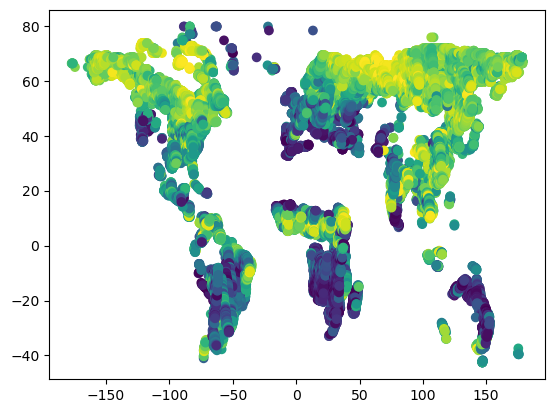

In [21]:
plt.scatter(obs_lon, obs_lat, c=obs_obs)
plt.show()

In [22]:
# No-data check
#  - single ensemble member integrations yield obs_obsvar==nodata)  
#  - in some cases obs_fcst (a.k.a. Obs_pred) is no-data-value, 
#     eg. SMOS Tb when snow is present)

obs_obsvar[obs_obsvar == nodata] = np.nan
obs_fcst[obs_fcst == nodata] = np.nan
obs_fcstvar[obs_fcstvar == nodata] = np.nan
obs_ana[obs_ana == nodata] = np.nan
obs_anavar[obs_anavar == nodata] = np.nan

In [23]:
#information for plotting

import cartopy.crs as ccrs

metric = 'ObsValue' # 'ObsValue' # 'ombg'
colmin = None
colmax = None
units = None

In [24]:
# Make obarray
    
numobs = len(obs_obs)

obarray = np.empty([numobs, 3])

if metric == 'ObsValue':
    obarray[:, 0] = obs_obsvar
if metric == 'ombg':
    obarray[:, 0] = obs_obs - obs_fcst

obarray[:, 1] = obs_lon
obarray[:, 2] = obs_lat

obarray[(obarray[ :, 0] > 1e16) , 0] = np.nan


# Compute and print some stats for the data
# -----------------------------------------
stdev = np.nanstd(obarray[:,0])  # Standard deviation
omean = np.nanmean(obarray[:, 0]) # Mean of the data
datmi = np.nanmin(obarray[:, 0])  # Min of the data
datma = np.nanmax(obarray[:, 0])  # Max of the data

print("Plotted data statistics: ")
print("Mean: ", omean)
print("Standard deviation: ", stdev)
print("Minimum ", datmi)
print("Maximum: ", datma)

Plotted data statistics: 
Mean:  2.5754166029659076
Standard deviation:  1.498102912351846
Minimum  1.0
Maximum:  4.0


In [25]:
# Norm for scatter plot
# ---------------------
norm = None


# Min max for colorbar
# --------------------
if np.nanmin(obarray[:, 0]) < 0:
    cmax = datma
    cmin = datmi
    cmap = 'RdBu'
else:
    cmax = omean+stdev
    cmin = np.maximum(omean-stdev, 0.0)
    cmap = 'viridis'

if metric == 'ObsValue':
    cmin = datmi
    cmax = datma

if metric == 'PreQC' or metric == 'EffectiveQC':
    cmin = datmi
    cmax = datma

# Specialized colorbar for integers
    cmap = plt.cm.jet
    cmaplist = [cmap(i) for i in range(cmap.N)]
    cmaplist[1] = (.5, .5, .5, 1.0)
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, cmap.N)
    bounds = np.insert(np.linspace(0.5, int(cmax)+0.5, int(cmax)+1), 0, 0)
    norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

# If using omb then use standard deviation for the cmin/cmax
if metric=='omb' or metric=='ombg' or metric=='oman':
    cmax = stdev
    cmin = -stdev

# Override with user chosen limits
if (colmin!=None):
    print("Using user provided minimum for colorbar")
    cmin = colmin
if (colmax!=None):
    print("Using user provided maximum for colorbar")
    cmax = colmax

Text(-0.08, 0.4, 'Latitude')

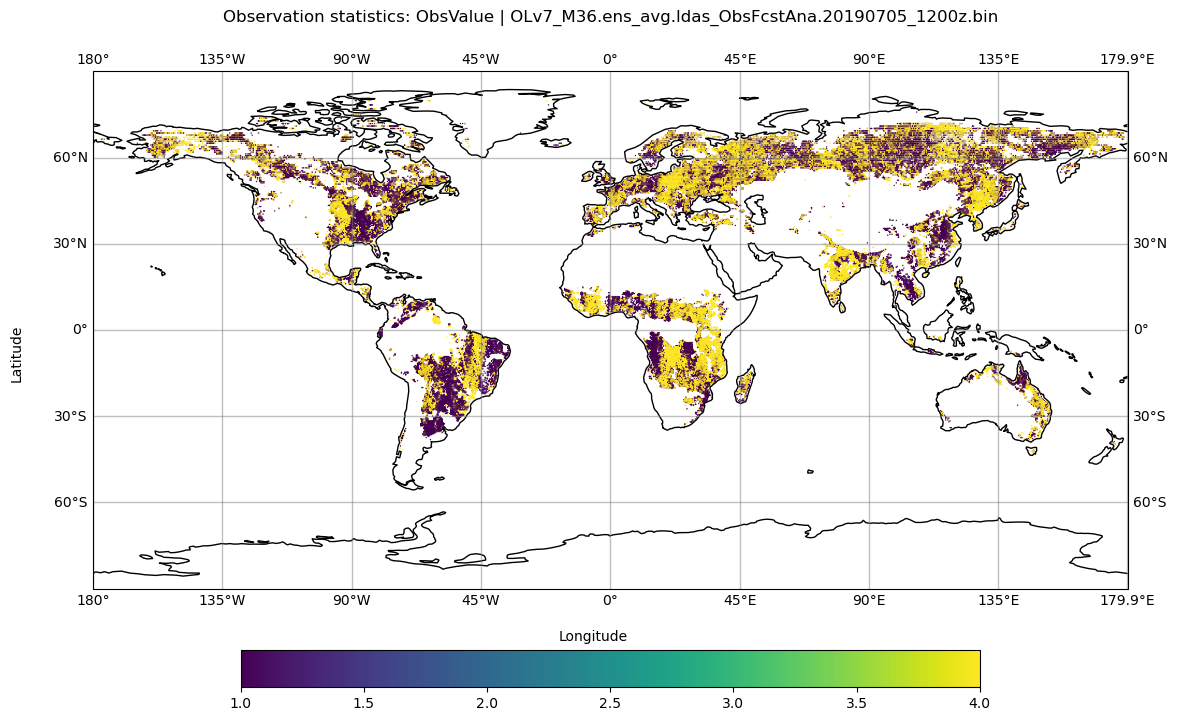

In [26]:
# Create figure
# -------------

fig = plt.figure(figsize=(16, 8))

# initialize the plot pointing to the projection
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0))

# plot grid lines
gl = ax.gridlines(crs=ccrs.PlateCarree(central_longitude=0), draw_labels=True,
                      linewidth=1, color='gray', alpha=0.5, linestyle='-')

gl.xlabel_style = {'size': 10, 'color': 'black'}
gl.ylabel_style = {'size': 10, 'color': 'black'}
gl.xlocator = mticker.FixedLocator([-180, -135, -90, -45, 0, 45, 90, 135, 179.9])
ax.set_ylabel("Latitude",  fontsize=7)
ax.set_xlabel("Longitude", fontsize=7)

ax.tick_params(labelbottom=False, labeltop=False, labelleft=False, labelright=False)

# scatter data
sc = ax.scatter(obarray[:, 1], obarray[:, 2],
                c=obarray[:, 0], s=1, linewidth=0,
                transform=ccrs.PlateCarree(), cmap=cmap, vmin=cmin, vmax=cmax, norm=norm)

# colorbar
cbar = plt.colorbar(sc, ax=ax, orientation="horizontal", pad=.1, fraction=0.06,)
if not units==None:
    cbar.ax.set_ylabel(units, fontsize=10)

# plot globally
ax.set_global()

# draw coastlines
ax.coastlines()

# figure labels
plt.title("Observation statistics: "+metric+" | "+
          file, y=1.08)
ax.text(0.45, -0.1,   'Longitude', transform=ax.transAxes, ha='left')
ax.text(-0.08, 0.4, 'Latitude', transform=ax.transAxes, rotation='vertical', va='bottom')

# savename = pname+'_'+metric+'.png'

# print(" Saving figure as", savename, "\n")
# plt.savefig(savename, dpi = 400)

In [27]:
np.nanmean(obs_obs), np.nanmean(obs_ana), np.nanmean(obs_fcst)

(0.5846453849749415, 0.2338379871462218, 0.2338379871462218)

In [28]:
tmp = obarray[(obarray[:, 2] > 60.6) & (obarray[:, 2] < 60.7), :]

test = tmp[(tmp[:, 1] > 80) & (tmp[:, 1] < 110), :]

np.size(test)

786

Text(-0.08, 0.4, 'Latitude')

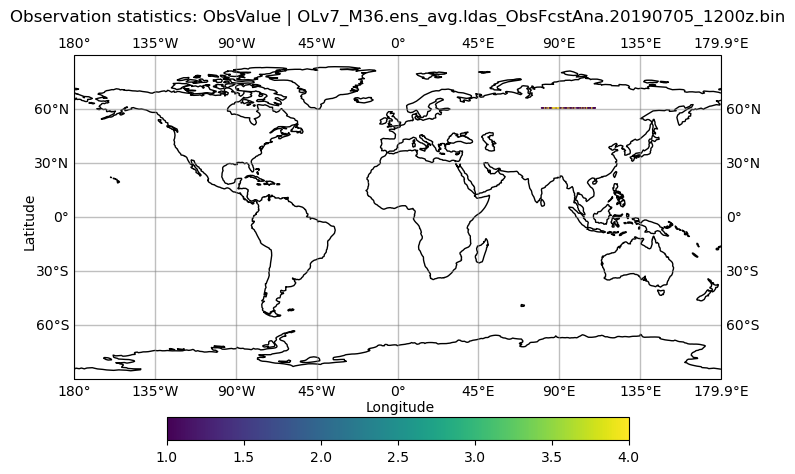

In [29]:
# Create figure
# -------------

fig = plt.figure(figsize=(10, 5))

# initialize the plot pointing to the projection
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0))

# plot grid lines
gl = ax.gridlines(crs=ccrs.PlateCarree(central_longitude=0), draw_labels=True,
                      linewidth=1, color='gray', alpha=0.5, linestyle='-')

gl.xlabel_style = {'size': 10, 'color': 'black'}
gl.ylabel_style = {'size': 10, 'color': 'black'}
gl.xlocator = mticker.FixedLocator([-180, -135, -90, -45, 0, 45, 90, 135, 179.9])
ax.set_ylabel("Latitude",  fontsize=7)
ax.set_xlabel("Longitude", fontsize=7)

ax.tick_params(labelbottom=False, labeltop=False, labelleft=False, labelright=False)

# scatter data
sc = ax.scatter(test[:, 1], test[:, 2],
                c=test[:, 0], s=1, linewidth=0,
                transform=ccrs.PlateCarree(), cmap=cmap, vmin=cmin, vmax=cmax, norm=norm)

# colorbar
cbar = plt.colorbar(sc, ax=ax, orientation="horizontal", pad=.1, fraction=0.06,)
if not units==None:
    cbar.ax.set_ylabel(units, fontsize=10)

# plot globally
ax.set_global()

# draw coastlines
ax.coastlines()

# figure labels
plt.title("Observation statistics: "+metric+" | "+
          file, y=1.08)
ax.text(0.45, -0.1,   'Longitude', transform=ax.transAxes, ha='left')
ax.text(-0.08, 0.4, 'Latitude', transform=ax.transAxes, rotation='vertical', va='bottom')

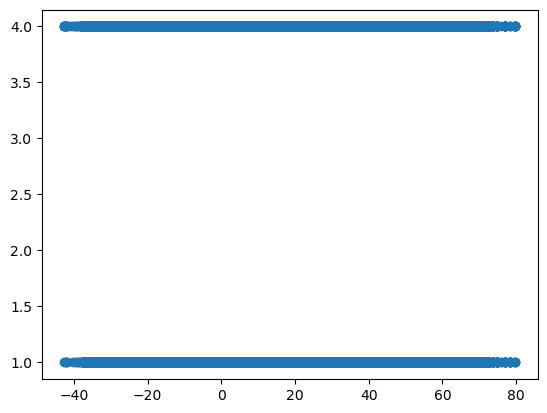

(2.5754166029659076, 1.498102912351846)

In [30]:
plt.scatter(obarray[:,2], obarray[:,0])
plt.show()

np.nanmean(obarray[:,0]), np.std(obarray[:,0])


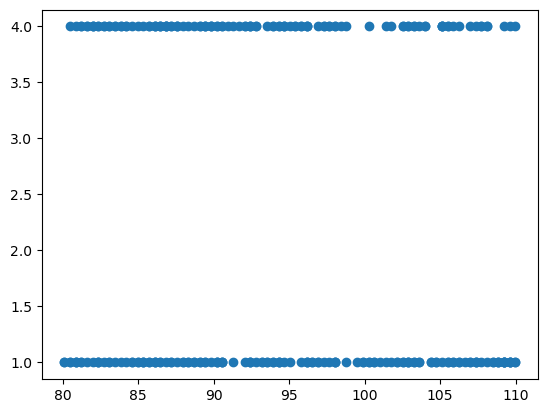

In [31]:
plt.scatter(test[:,1], test[:,0])
plt.show()

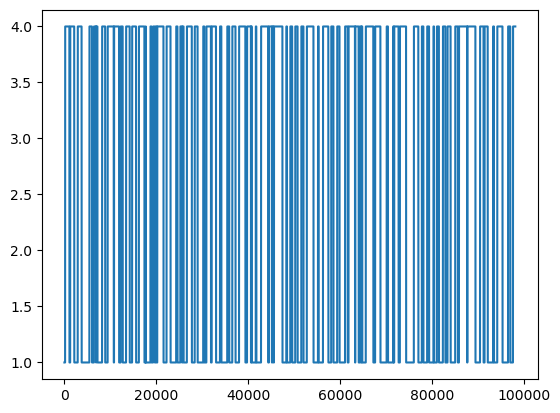

In [32]:
plt.plot(obs_obsvar)
plt.show()

In [33]:
obs_obsvar

array([1., 1., 1., ..., 4., 4., 4.])